In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image,display
%matplotlib inline
import missingno


In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df2=df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
train_dict=pd.DataFrame(df.dtypes,columns=['Data types'])
train_dict['null']=df.isnull().sum()
train_dict['unique vals']=df.nunique()
train_dict['count']=df.count()
train_dict

,Data types,null,unique vals,count
age,int64,0,41,303
sex,int64,0,2,303
cp,int64,0,4,303
trestbps,int64,0,49,303
chol,int64,0,152,303
fbs,int64,0,2,303
restecg,int64,0,3,303
thalach,int64,0,91,303
exang,int64,0,2,303
oldpeak,float64,0,40,303


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a5b065290>,
      dtype=object)

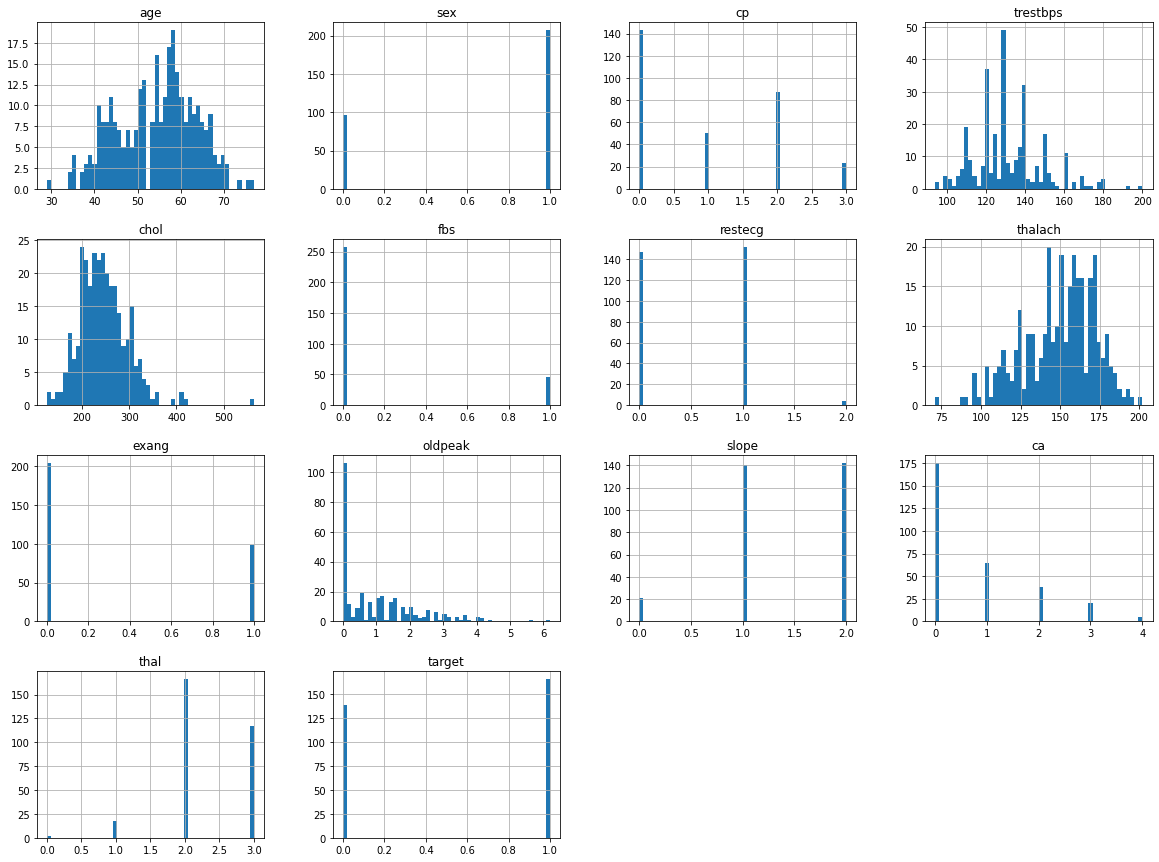

In [10]:
df.hist(bins=50,figsize=((20,15)))

In [11]:
train_dict

,Data types,null,unique vals,count
age,int64,0,41,303
sex,int64,0,2,303
cp,int64,0,4,303
trestbps,int64,0,49,303
chol,int64,0,152,303
fbs,int64,0,2,303
restecg,int64,0,3,303
thalach,int64,0,91,303
exang,int64,0,2,303
oldpeak,float64,0,40,303


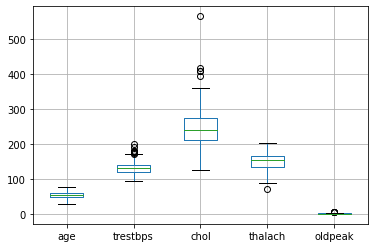

In [12]:
numerical=['age','trestbps','chol','thalach','oldpeak']
df[numerical].boxplot()

In [13]:
df.shape

(303, 14)

In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [15]:
for i in numerical:
    df = remove_outlier(df, i)

In [16]:
df.shape

(279, 14)

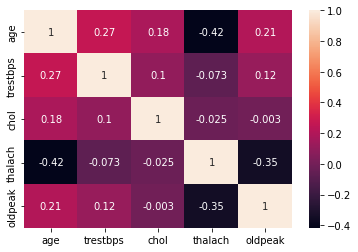

In [17]:
corrMatrix = df[numerical].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
cate_dum=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first=True)
cate_dum.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [19]:
X=df.drop('target',1)
y=df.target

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [23]:
get_score(LogisticRegression(),X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8214285714285714

In [46]:
get_score(SVC(kernel='linear'),X_train, X_test, y_train, y_test)


0.8095238095238095

In [25]:
get_score( RandomForestClassifier(n_estimators =100),X_train, X_test, y_train, y_test)

0.8452380952380952

In [26]:
get_score(KNeighborsClassifier(n_neighbors=6),X_train, X_test, y_train, y_test)


0.6309523809523809

In [27]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 1) 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [28]:
y_pred = rf.predict(X_test)
y_true = y_test

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

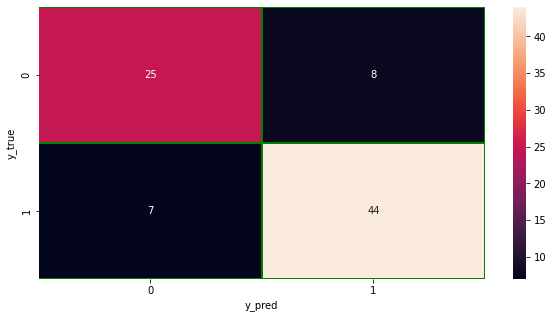

In [30]:
import seaborn as sns

f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,linecolor = "green",fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()